In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [8]:
data = {
    'Age': [25, 30, 22, 35, 28, 40],
    'Income': [50000, 60000, 45000, 80000, 52000, 70000],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Education Level': ['Bachelor\'s', 'Master\'s', 'High School', 'PhD', 'Bachelor\'s', 'Master\'s'],
    'Purchase': [0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df.head()

,Age,Income,Gender,Education Level,Purchase
0,25,50000,Male,Bachelor's,0
1,30,60000,Female,Master's,1
2,22,45000,Female,High School,0
3,35,80000,Male,PhD,1
4,28,52000,Male,Bachelor's,0


In [9]:
# Features and target variable
X = df.drop('Purchase', axis=1)
y = df['Purchase']

# Preprocessing
numeric_features = ['Age', 'Income']
categorical_features = ['Gender', 'Education Level']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5


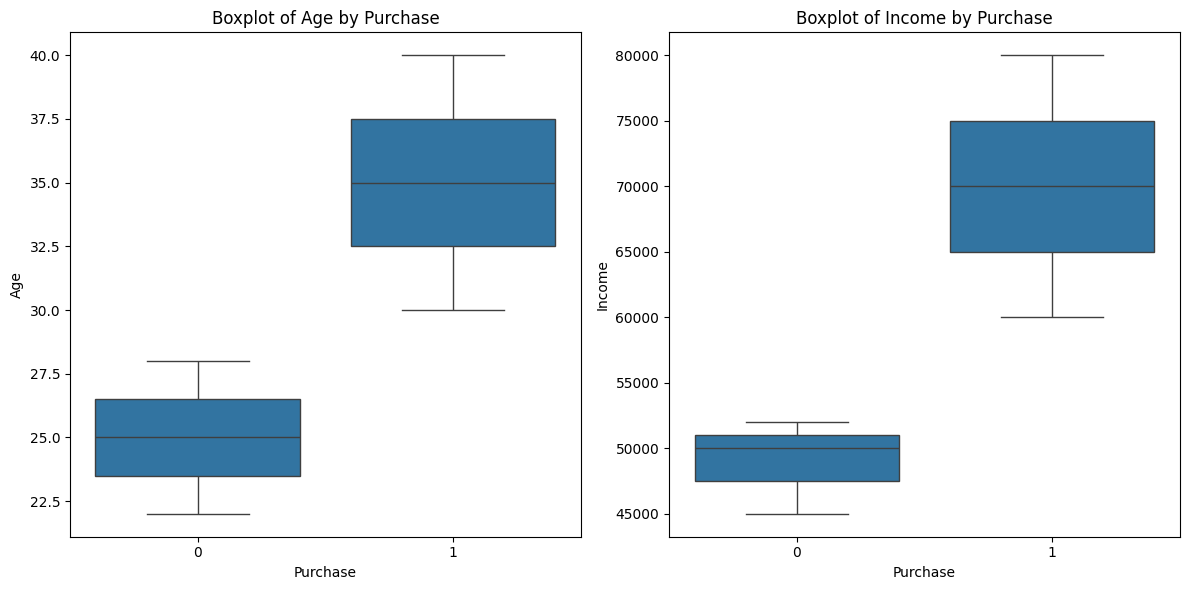

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Purchase', y='Age', data=df)
plt.title('Boxplot of Age by Purchase')

plt.subplot(1, 2, 2)
sns.boxplot(x='Purchase', y='Income', data=df)
plt.title('Boxplot of Income by Purchase')

plt.tight_layout()
plt.show()